In [3]:
import os, shutil

original_dataset_dir = 'C:/Users/buchr/Downloads/archive/gaussian_filtered_images/No_DR'
base_dir = 'C:/Users/buchr/Downloads/diabetic_retinopathy_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') # create a new directory where we store the pictures and stuff
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_normalDR_dir = os.path.join(train_dir, 'normalDR')
os.mkdir(train_normalDR_dir)

train_moderateDR_dir = os.path.join(train_dir, 'moderateDR') # cat = normalDR, dog = moderateDR
os.mkdir(train_moderateDR_dir)

validation_normalDR_dir = os.path.join(validation_dir, 'normalDR')
os.mkdir(validation_normalDR_dir)

validation_moderateDR_dir = os.path.join(validation_dir, 'moderateDR')
os.mkdir(validation_moderateDR_dir)

test_normalDR_dir = os.path.join(test_dir, 'normalDR')
os.mkdir(test_normalDR_dir)

test_moderateDR_dir = os.path.join(test_dir, 'moderateDR')
os.mkdir(test_moderateDR_dir)

fnames = ['{}.normal.png'.format(i) for i in range(1, 800)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_normalDR_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.normal.png'.format(i) for i in range(800, 1300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_normalDR_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.normal.png'.format(i) for i in range(1300, 1800)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_normalDR_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.moderate.png'.format(i) for i in range(1, 310)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_moderateDR_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.moderate.png'.format(i) for i in range(310, 620)] # just not enough, but we'll manage for now with other stuff
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_moderateDR_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.moderate.png'.format(i) for i in range (620, 950)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_moderateDR_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) #instantiate a covnet for diabetic
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\buchr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #start training soon
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

Found 1108 images belonging to 2 classes.
Found 810 images belonging to 2 classes.


In [7]:
import sys
!{sys.executable} -m pip install scipy 

ERROR: Invalid requirement: '#'


In [13]:
from PIL import Image
import scipy
#begin model fitting, 30 epochs
history = model.fit(train_generator,
                             steps_per_epoch=90,
                             epochs=15,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/15
90/90 [==============================] - 16s 181ms/step - loss: 0.1732 - acc: 0.9298 - val_loss: 0.1901 - val_acc: 0.9240
Epoch 2/15
90/90 [==============================] - 16s 179ms/step - loss: 0.1633 - acc: 0.9410 - val_loss: 0.1944 - val_acc: 0.9280
Epoch 3/15
90/90 [==============================] - 16s 183ms/step - loss: 0.1650 - acc: 0.9400 - val_loss: 0.1763 - val_acc: 0.9340
Epoch 4/15
90/90 [==============================] - 17s 184ms/step - loss: 0.1612 - acc: 0.9467 - val_loss: 0.1404 - val_acc: 0.9360
Epoch 5/15
90/90 [==============================] - 17s 184ms/step - loss: 0.1257 - acc: 0.9521 - val_loss: 0.1739 - val_acc: 0.9400
Epoch 6/15
90/90 [==============================] - 17s 184ms/step - loss: 0.1255 - acc: 0.9543 - val_loss: 0.2022 - val_acc: 0.9280
Epoch 7/15
90/90 [==============================] - 17s 183ms/step - loss: 0.1277 - acc: 0.9555 - val_loss: 0.1874 - val_acc: 0.9300
Epoch 8/15
90/90 [==============================] - 17s 187ms/step - 

In [14]:
model.save('detect_diabetic_retinopathy_1.h5')

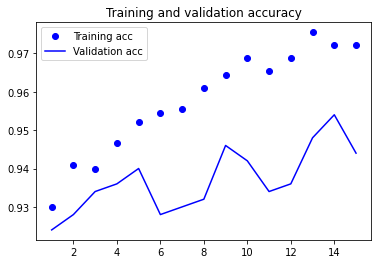

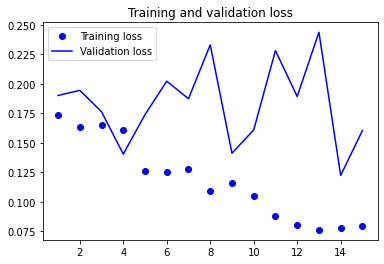

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc'] #displaying curves of loss and accuracy during training using matplotlib
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()